<a href="https://colab.research.google.com/github/IronZiiz/Data-Science_Time-Series/blob/main/Regression_with_prophet_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case: Predict model (Ozone Concentration)
An environmental consulting company hired us, as data scientists, to create a predictive model capable of forecasting the amount of ozone that will be released and its daily concentration over the next few months, allowing us to anticipate and prepare for the future.

In addition, this company requested that we develop a web application where we can input the number of days for which we want to predict daily ozone levels, and the prediction is then generated.

## Imports


In [42]:
import pandas as pd
import plotly.express as px
import calendar
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import plot_components_plotly

## Data exploration

In [22]:
df  = pd.read_csv("/content/drive/MyDrive/Alura/Data-science_Regressão:prevendo-séries-temporais-com-Prophe/poluentes.csv")
df

,Data,PM2.5,PM10,SO2,NO2,CO,O3,TEMP
0,2020-03-01,7.0,11.0,12.0,23.0,429.0,64.0,1.0
1,2020-03-02,31.0,42.0,37.0,67.0,825.0,30.0,1.0
2,2020-03-03,77.0,121.0,61.0,81.0,1621.0,19.0,6.0
3,2020-03-04,23.0,45.0,23.0,46.0,606.0,54.0,10.0
4,2020-03-05,149.0,184.0,94.0,133.0,2358.0,68.0,6.0
...,...,...,...,...,...,...,...,...
1455,2024-02-24,22.0,33.0,17.0,59.0,575.0,51.0,5.0
1456,2024-02-25,11.0,20.0,7.0,43.0,421.0,66.0,7.0
1457,2024-02-26,28.0,41.0,10.0,65.0,721.0,49.0,7.0
1458,2024-02-27,75.0,97.0,21.0,98.0,1427.0,37.0,8.0


In [23]:
df.dtypes

,0
Data,object
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64
O3,float64
TEMP,float64


In [24]:
# convert Data to datetime
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

,0
Data,datetime64[ns]
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64
O3,float64
TEMP,float64


In [25]:
# Vizualize how the O3 evaluate day-by-day
fig = px.line(df, x="Data", y="O3")
fig.show()

In [26]:
# Check sazonallity
df_2022 = df[df['Data'].dt.year == 2022 ]
df_2022_mensal = df_2022.groupby(df_2022['Data'].dt.month)['O3'].mean().reset_index()

df_2022_mensal['Mês'] = df_2022_mensal['Data'].apply(lambda x: calendar.month_abbr[x])

fig = px.bar(df_2022_mensal, x="Mês", y="O3", title = '03 ug/m3 mean for month in 2022')
fig.show()

## Predict model (First model)
Here we trained the model without slice in train and test.
its just a playground  (first steps )




In [27]:
df_prophet = pd.DataFrame()

df_prophet['ds'] = df['Data']
df_prophet['y'] = df['O3']
df_prophet

,ds,y
0,2020-03-01,64.0
1,2020-03-02,30.0
2,2020-03-03,19.0
3,2020-03-04,54.0
4,2020-03-05,68.0
...,...,...
1455,2024-02-24,51.0
1456,2024-02-25,66.0
1457,2024-02-26,49.0
1458,2024-02-27,37.0


In [28]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)

futuro = modelo.make_future_dataframe(periods = 365, freq = 'D') # 365 = days. we want predict one year
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkhvemb22/hvjvwpb6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkhvemb22/a1_e2j48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90606', 'data', 'file=/tmp/tmpkhvemb22/hvjvwpb6.json', 'init=/tmp/tmpkhvemb22/a1_e2j48.json', 'output', 'file=/tmp/tmpkhvemb22/prophet_model70ibikhr/prophet_model-20250225010127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:01:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:01:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [29]:
fig = plot_plotly(modelo, previsao)
fig.show()

In [30]:
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-01,36.708750,-11.423571,49.879511,36.708750,36.708750,-17.570460,-17.570460,-17.570460,-2.094423,-2.094423,-2.094423,-15.476037,-15.476037,-15.476037,0.0,0.0,0.0,19.138290
1,2020-03-02,36.736524,-6.297502,54.194609,36.736524,36.736524,-13.465359,-13.465359,-13.465359,0.919980,0.919980,0.919980,-14.385338,-14.385338,-14.385338,0.0,0.0,0.0,23.271165
2,2020-03-03,36.764298,-7.189595,56.245281,36.764298,36.764298,-10.614908,-10.614908,-10.614908,2.599164,2.599164,2.599164,-13.214072,-13.214072,-13.214072,0.0,0.0,0.0,26.149390
3,2020-03-04,36.792072,-5.920984,55.542039,36.792072,36.792072,-11.796323,-11.796323,-11.796323,0.186921,0.186921,0.186921,-11.983244,-11.983244,-11.983244,0.0,0.0,0.0,24.995749
4,2020-03-05,36.819846,-3.379147,56.557718,36.819846,36.819846,-10.523998,-10.523998,-10.523998,0.190901,0.190901,0.190901,-10.714899,-10.714899,-10.714899,0.0,0.0,0.0,26.295848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2025-02-23,62.126743,9.516483,69.112572,60.551676,63.523067,-21.557137,-21.557137,-21.557137,-2.094423,-2.094423,-2.094423,-19.462714,-19.462714,-19.462714,0.0,0.0,0.0,40.569606
1821,2025-02-24,62.124323,13.974234,73.743592,60.543791,63.529653,-18.292881,-18.292881,-18.292881,0.919980,0.919980,0.919980,-19.212860,-19.212860,-19.212860,0.0,0.0,0.0,43.831442
1822,2025-02-25,62.121903,16.612816,76.757365,60.535905,63.536142,-16.206558,-16.206558,-16.206558,2.599164,2.599164,2.599164,-18.805722,-18.805722,-18.805722,0.0,0.0,0.0,45.915345
1823,2025-02-26,62.119482,13.276886,73.417160,60.528020,63.538583,-18.058197,-18.058197,-18.058197,0.186921,0.186921,0.186921,-18.245118,-18.245118,-18.245118,0.0,0.0,0.0,44.061285


In [31]:
previsão = previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
previsão

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-01,19.138290,-11.423571,49.879511
1,2020-03-02,23.271165,-6.297502,54.194609
2,2020-03-03,26.149390,-7.189595,56.245281
3,2020-03-04,24.995749,-5.920984,55.542039
4,2020-03-05,26.295848,-3.379147,56.557718
...,...,...,...,...
1820,2025-02-23,40.569606,9.516483,69.112572
1821,2025-02-24,43.831442,13.974234,73.743592
1822,2025-02-25,45.915345,16.612816,76.757365
1823,2025-02-26,44.061285,13.276886,73.417160


In [32]:
# Plot coments
plot_components_plotly(modelo, previsao)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



### How prophet components works

y(t) = g(t) + s(t) + h(t) + ϵt

y(t): real value/observed value

g(t): tendency component

s(t): sazonality tendenci

h(t): component holliday

ϵt: error

## Predict model (Second model)


In [33]:
# shape
df_prophet.shape

(1460, 2)

In [34]:
leght_train = int(len(df_prophet) * 0.8)
leght_test = int(len(df_prophet) * 0.2)

print(leght_train, leght_test)

1168 292


In [35]:
# Train Dataframe

df_train = pd.DataFrame()
df_train['ds'] = df_prophet['ds'][:1168]
df_train['y'] = df_prophet['y'][:1168]

# Test Dataframe

df_test = pd.DataFrame()
df_test['ds'] = df_prophet['ds'][1168:]
df_test['y'] = df_prophet['y'][1168:]

In [40]:
# Build a model
np.random.seed(4587)

model = Prophet()
model.fit(df_train)

future = model.make_future_dataframe(periods = 292, freq = 'D' )
predict =  model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkhvemb22/fwkid8m8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkhvemb22/f_v674yk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35479', 'data', 'file=/tmp/tmpkhvemb22/fwkid8m8.json', 'init=/tmp/tmpkhvemb22/f_v674yk.json', 'output', 'file=/tmp/tmpkhvemb22/prophet_modelz0cxp9hp/prophet_model-20250225010551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:05:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:05:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


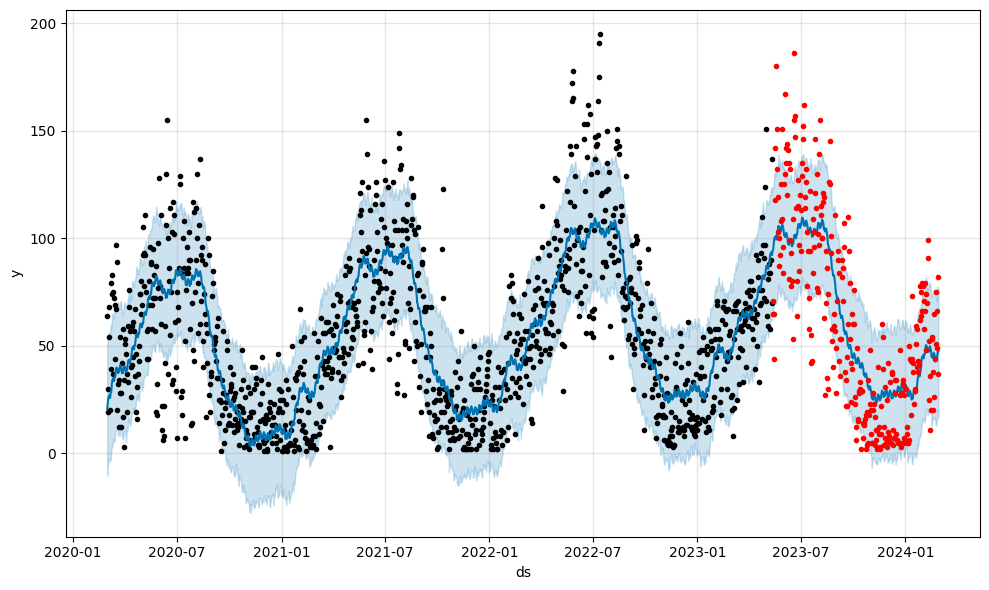

In [43]:
fig1 = model.plot(predict)

plt.plot(df_test['ds'], df_test['y'], '.r')
plt.show()